# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict whether a customer canceled their reservation using the provided `hotel_booking.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict  whether a customer canceled their reservation.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [1]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [3]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [4]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [5]:
df = pd.read_csv("hotel_bookings.csv")

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1


In [7]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """
    return df.describe().astype(int)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [8]:
calculate_descriptive_statistics(df)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,required_car_parking_spaces,total_of_special_requests
count,119390,119390,119390,119390,119390,119390,119390,119386,119390,119390,119390,119390,119390,103050,6797,119390,119390
mean,104,2016,27,15,0,2,1,0,0,0,0,0,0,86,189,0,0
std,106,0,13,8,0,1,0,0,0,0,0,1,0,110,131,0,0
min,0,2015,1,1,0,0,0,0,0,0,0,0,0,1,6,0,0
25%,18,2016,16,8,0,1,2,0,0,0,0,0,0,9,62,0,0
50%,69,2016,28,16,1,2,2,0,0,0,0,0,0,14,179,0,0
75%,160,2017,38,23,2,3,2,0,0,0,0,0,0,229,270,0,1
max,737,2017,53,31,19,50,55,10,10,1,26,72,21,535,543,8,5


In [9]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """
    sns.pairplot(df.select_dtypes(include=np.number))
    plt.show()

    # YOUR CODE HERE
    raise NotImplementedError()

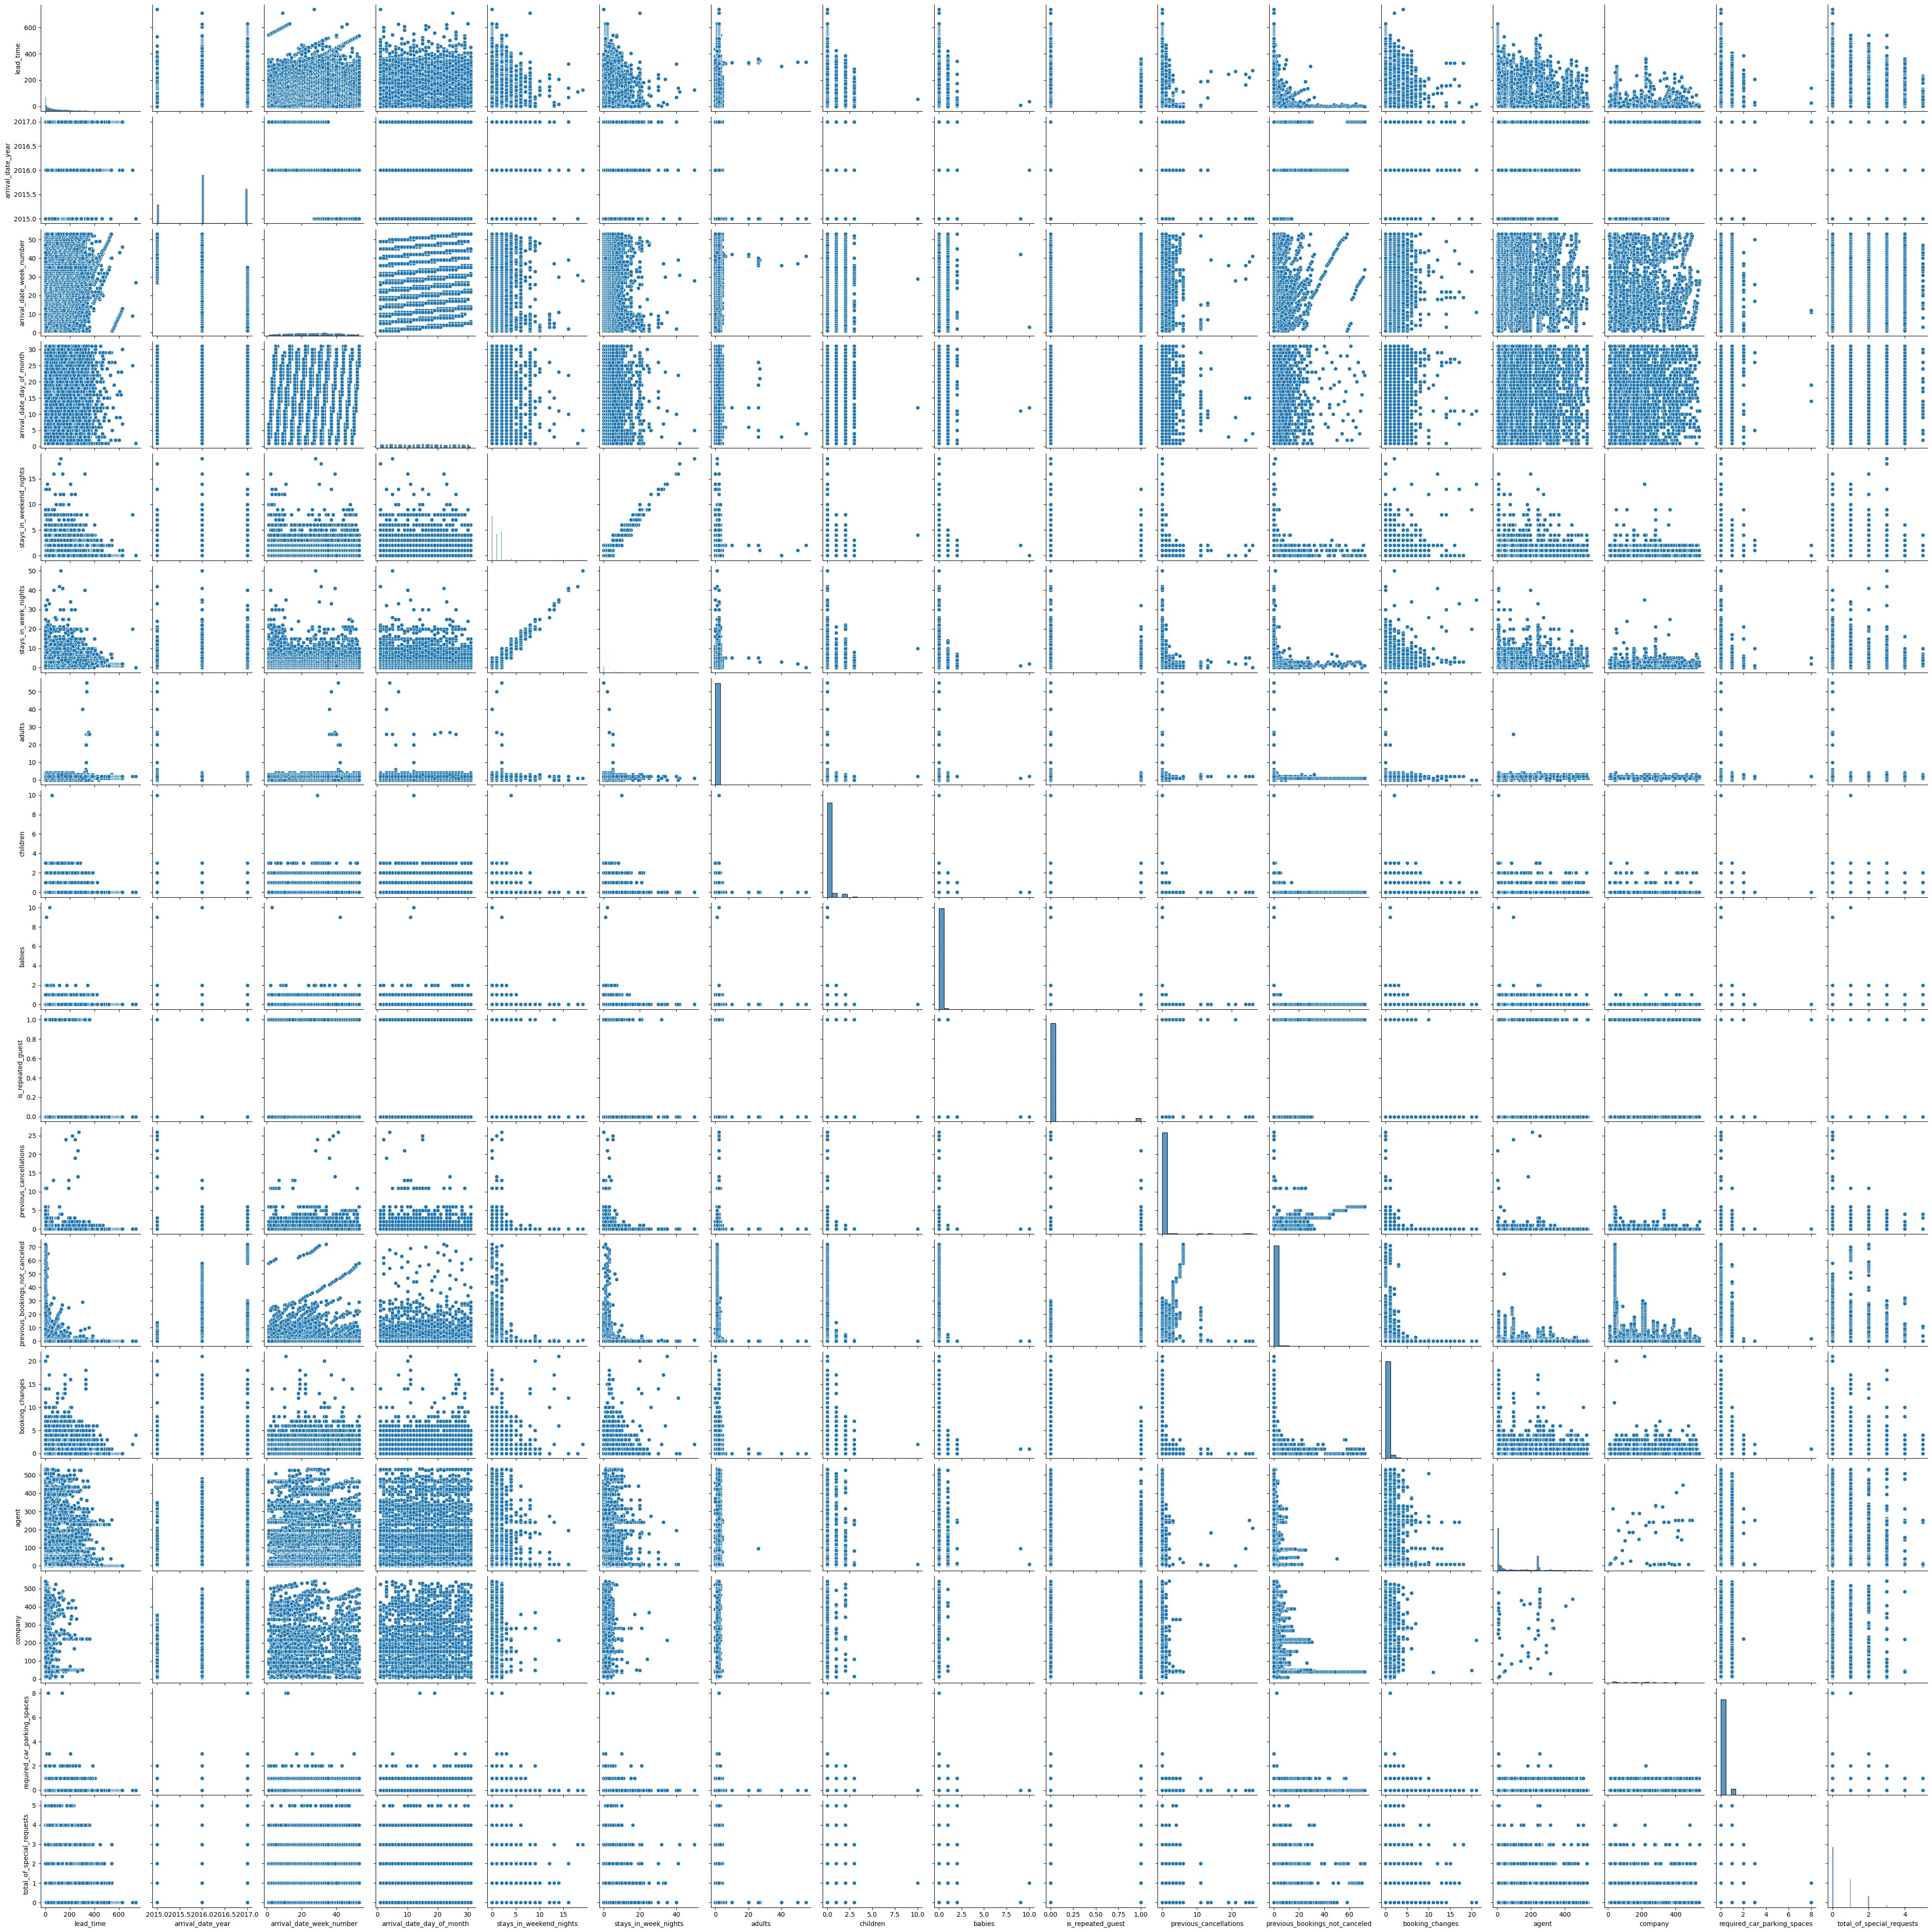

NotImplementedError: 

In [11]:
plot_pairwise_relationships(df)

In [12]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """
    plt.figure(figsize=(15, 11))
    sns.heatmap(df.corr(numeric_only=True), annot=True)
    plt.show()

    # YOUR CODE HERE
    raise NotImplementedError()

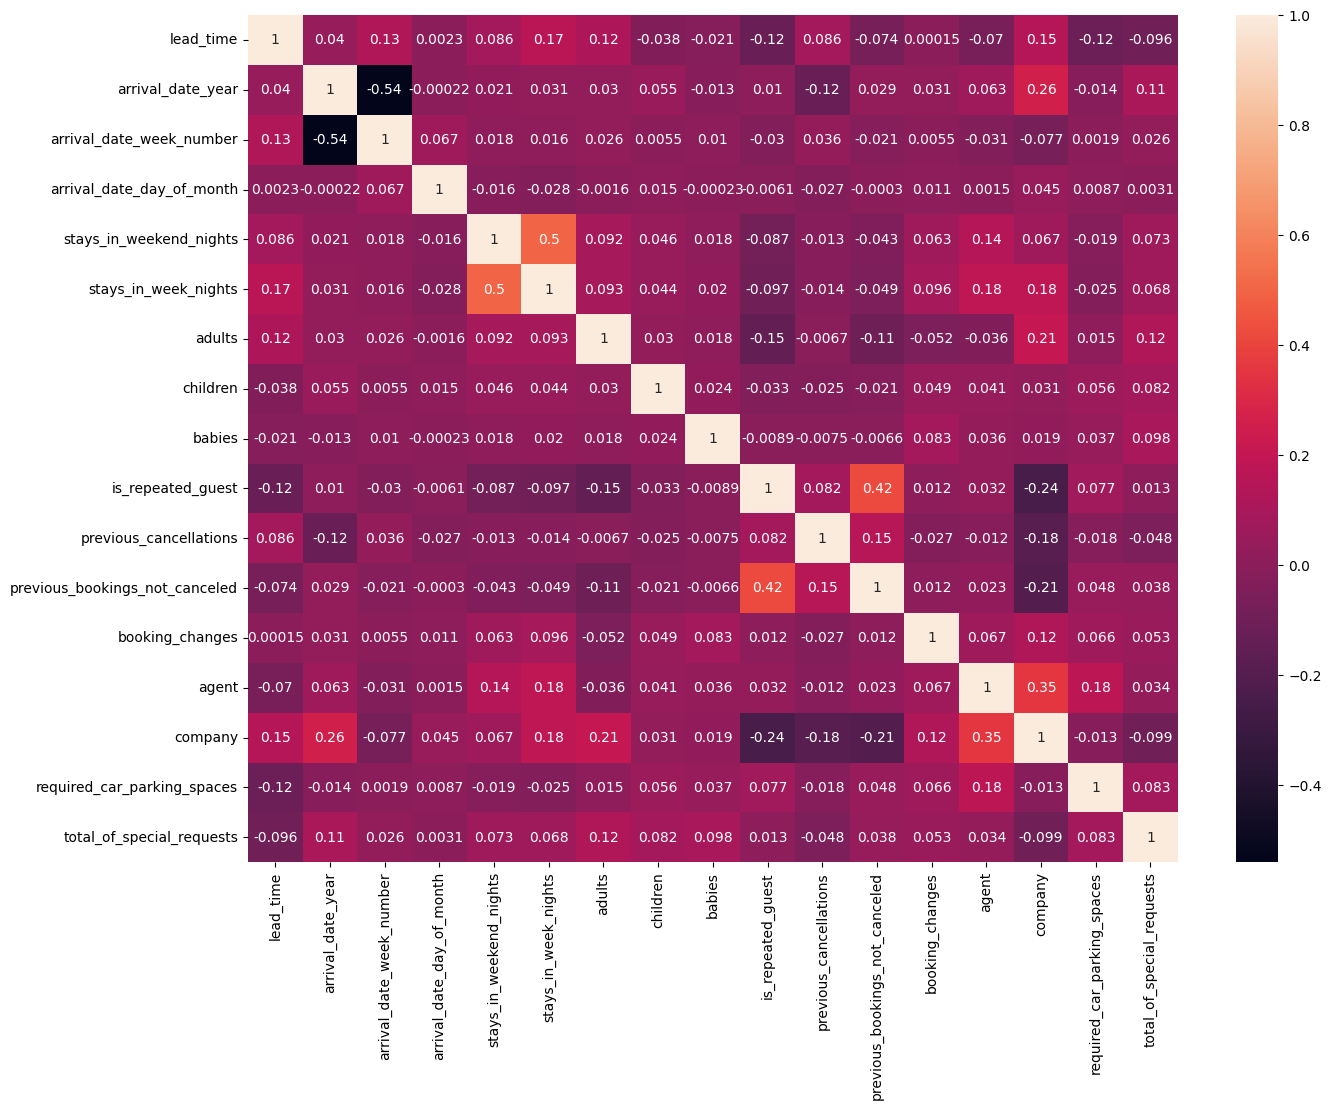

NotImplementedError: 

In [13]:
plot_correlation_intensity(df)

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1


In [15]:
### MANUALLY GRADED TASK
def plot_lead_time_boxplot(df):
    """
    Create a boxplot showing how lead time differs between canceled and non-canceled bookings.
    """
    return sns.boxplot(df, x="is_canceled", y="lead_time")
    
    # YOUR CODE HERE
    raise NotImplementedError()

<Axes: xlabel='is_canceled', ylabel='lead_time'>

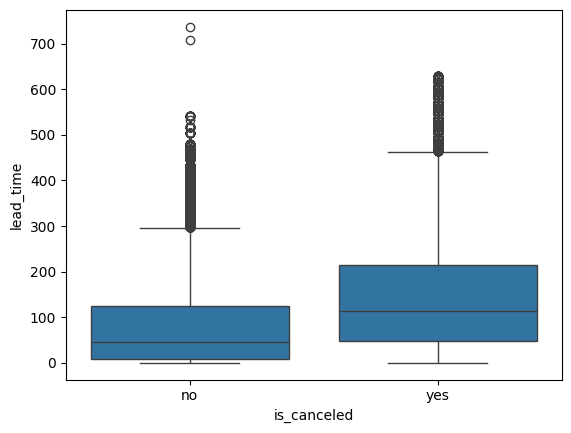

In [16]:
plot_lead_time_boxplot(df)

In [17]:
### MANUALLY GRADED TASK
def plot_cancellation_counts(df):
    """
    Create a bar plot showing how many bookings were canceled vs not canceled.
    """
    counts_per_type = df["is_canceled"].value_counts()
    plt.bar(counts_per_type.index, counts_per_type)
    plt.show()

    # YOUR CODE HERE
    raise NotImplementedError()


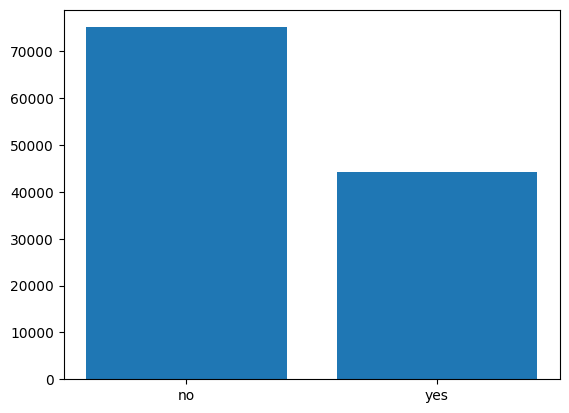

NotImplementedError: 

In [18]:
plot_cancellation_counts(df)

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1


In [20]:
### AUTOMATICALLY GRADED TASK
def impute_children_mode(df):
    """
    Fill missing values in `children` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    df['children'] = df['children'].fillna(df['children'].mode()[0])
    return df
    
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return df

In [21]:
impute_children_mode(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [22]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
customer_type                          0
required_car_par

In [23]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_children_mode(_df)
assert hash_data_frame(_df) == "2f1c5dfe0828d78ea1a8f9c5976821a9a3eaca07cfe98326304d5972c11b361b"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
### AUTOMATICALLY GRADED TASK
def impute_country_mode(df):
    """
    Fill missing values in `country` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    df['country'] = df['country'].fillna(df['country'].mode()[0])
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return df

In [26]:
impute_country_mode(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [27]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_country_mode(_df)
assert hash_data_frame(_df) == "528991530f1e5408a3bcbcf681a1c62189e516366e6a767ce163320e705487e5"

In [28]:
### MANUALLY GRADED TASK
def impute_agent_company_knn(df):
    """
    Impute missing values in `agent` and `company` using KNNImputer with the appropriate columns.
    
    Note: The imputed values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    imputer = KNNImputer(n_neighbors=5)
    df[["agent", "company"]] = imputer.fit_transform(df[["agent", "company"]]).astype(int)
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df


In [29]:
impute_agent_company_knn(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,86,189,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,86,189,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,86,189,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304,108,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240,280,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394,405,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9,268,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9,268,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89,50,Transient,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
df['hotel'].sample(10)

30946     Resort Hotel
40207       City Hotel
103708      City Hotel
85144       City Hotel
109991      City Hotel
110622      City Hotel
47790       City Hotel
44992       City Hotel
30528     Resort Hotel
16886     Resort Hotel
Name: hotel, dtype: object

In [32]:
df["hotel"].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [36]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_hotel(df):
    """
    Encode the `hotel` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """
    # one_hot_encoded_values = pd.get_dummies(df["hotel"])
    # df = pd.concat([df, one_hot_encoded_values], axis=1)
    df = df.drop(columns= ['hotel'])
    return df



    # YOUR CODE HERE
    raise NotImplementedError()
    
    return df

In [37]:
encode_or_drop_hotel(df)

KeyError: "['hotel'] not found in axis"

In [38]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_hotel(_df)
assert hash_data_frame(_df) == "ddfef26391e08ec0e788486481c885ebeecda826fa125e665e4eeea6096b91c9"

In [39]:
df.head(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,no,342,2015,July,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,86,189,Transient,0,0
1,no,737,2015,July,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,86,189,Transient,0,0
2,no,7,2015,July,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,86,189,Transient,0,0
3,no,13,2015,July,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,304,108,Transient,0,0
4,no,14,2015,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240,280,Transient,0,1
5,no,14,2015,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240,280,Transient,0,1
6,no,0,2015,July,27,1,0,2,2,0.0,...,0,C,C,0,No Deposit,86,189,Transient,0,0
7,no,9,2015,July,27,1,0,2,2,0.0,...,0,C,C,0,No Deposit,303,108,Transient,0,1
8,yes,85,2015,July,27,1,0,3,2,0.0,...,0,A,A,0,No Deposit,240,280,Transient,0,1
9,yes,75,2015,July,27,1,0,3,2,0.0,...,0,D,D,0,No Deposit,15,140,Transient,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [41]:
### AUTOMATICALLY GRADED TASK
def encode_is_canceled(df):
    """
    Encode the `is_canceled` column manually:
    - "no"  -> 0
    - "yes" -> 1
    
    Return the updated dataset as `pd.DataFrame`.
    """
    def encode_variable(value):
        if value == "no":
            return 0
        else:
            return 1

    df["is_canceled"] = df["is_canceled"].apply(encode_variable)
    return df

    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [42]:
encode_is_canceled(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,86,189,Transient,0,0
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,86,189,Transient,0,0
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,86,189,Transient,0,0
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,304,108,Transient,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240,280,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,394,405,Transient,0,0
119386,0,102,2017,August,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,9,268,Transient,0,2
119387,0,34,2017,August,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,9,268,Transient,0,4
119388,0,109,2017,August,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,89,50,Transient,0,0


In [43]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_is_canceled(_df)
assert hash_data_frame(_df) == "bd5c6cf86d2ef9dc64162cb8d9d8be54b1247e6a0da08074085d6c4bf86b71df"

In [44]:
### AUTOMATICALLY GRADED TASK
def encode_arrival_date_month(df):
    """
    Encode the `arrival_date_month` column using OrdinalEncoder
    with fixed calendar order (January → December).

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    values = ['January','February','March','April','May','June','July','August','September','October','November','December']
    ordinal_encoder = OrdinalEncoder(categories=[values])
    df['arrival_date_month'] = ordinal_encoder.fit_transform(df[['arrival_date_month']]).astype(int)
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df


In [45]:
encode_arrival_date_month(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,86,189,Transient,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,86,189,Transient,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,86,189,Transient,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,304,108,Transient,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240,280,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,394,405,Transient,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,9,268,Transient,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,9,268,Transient,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,89,50,Transient,0,0


In [46]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_arrival_date_month(_df)
assert hash_data_frame(_df) == "5def409216f31ceb05b96377d444141c7e28cfca808a8481484ab0443a873c99"

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [48]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [49]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_meal(df):
    """
    Encode the `meal` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """
    df['meal'] = OrdinalEncoder().fit_transform(df[['meal']]).astype(int)
    return df

    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [50]:
encode_or_drop_meal(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,86,189,Transient,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,86,189,Transient,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,86,189,Transient,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,304,108,Transient,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240,280,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,394,405,Transient,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,9,268,Transient,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,9,268,Transient,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,89,50,Transient,0,0


In [51]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_meal(_df)
assert hash_data_frame(_df) == "1c7fbbbcd1b083a264a946bce4188949dd3d27882ce357b27e5ecddee7c3c3e2"

In [84]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_country(df):
    """
    Encode the `country` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """
    df = df.drop(columns=['country'])
    return df
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [85]:
encode_or_drop_country(df)

KeyError: "['country'] not found in axis"

In [86]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_country(_df)
print(hash_data_frame(_df))
assert hash_data_frame(_df) == "be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56"

be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int32  
 12  is_repeated_gues

In [55]:
df['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [56]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_customer_type(df):
    """
    Encode the `customer_type` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    df['customer_type'] = OrdinalEncoder().fit_transform(df[['customer_type']]).astype(int)
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [57]:
encode_or_drop_customer_type(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,86,189,2,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,86,189,2,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,86,189,2,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,304,108,2,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240,280,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,394,405,2,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,9,268,2,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,9,268,2,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,89,50,2,0,0


In [58]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_customer_type(_df)
assert hash_data_frame(_df) == "6c55892a0f98882ac8720b5ec0350a71cfb936ebcde9472c604ce364ce1da6a5"

In [59]:
### AUTOMATICALLY GRADED TASK
def encode_deposit_type(df):
    """
    Encode the `deposit_type` column using OrdinalEncoder
    with fixed order ['No Deposit', 'Non Refund', 'Refundable'].

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    type = [['No Deposit', 'Non Refund', 'Refundable']]
    ordinalEncoder = OrdinalEncoder(categories=type)
    df['deposit_type'] = ordinalEncoder.fit_transform(df[['deposit_type']]).astype(int)
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [60]:
encode_deposit_type(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,C,C,3,0,86,189,2,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,C,C,4,0,86,189,2,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,A,C,0,0,86,189,2,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,A,A,0,0,304,108,2,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,A,A,0,0,240,280,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,A,A,0,0,394,405,2,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,E,E,0,0,9,268,2,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,D,D,0,0,9,268,2,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,A,A,0,0,89,50,2,0,0


In [61]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_deposit_type(_df)
assert hash_data_frame(_df) == "d580508ad442d05888f34e34be95f40be99758e97d57cf98bc5085ff48df32ba"

In [62]:
### AUTOMATICALLY GRADED TASK
def combine_person_columns(df):
    """
    Create a new column 'total_persons' as the sum of 'adults', 'children', and 'babies'.
    Then drop the original three columns.

    Return the updated dataset as `pd.DataFrame`.
    """
    # df['total'] = df['adults'] + df['children'] + df['babies']
    # df = df.drop(columns=['adults','children','babies'])
    # return df

    df['total_persons'] = df['adults'] + df['children'] + df['babies']
    df = df.drop(columns=['adults', 'children', 'babies'])
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [63]:
combine_person_columns(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests,total_persons
0,0,342,2015,6,27,1,0,0,0,PRT,...,C,C,3,0,86,189,2,0,0,2.0
1,0,737,2015,6,27,1,0,0,0,PRT,...,C,C,4,0,86,189,2,0,0,2.0
2,0,7,2015,6,27,1,0,1,0,GBR,...,A,C,0,0,86,189,2,0,0,1.0
3,0,13,2015,6,27,1,0,1,0,GBR,...,A,A,0,0,304,108,2,0,0,1.0
4,0,14,2015,6,27,1,0,2,0,GBR,...,A,A,0,0,240,280,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,0,BEL,...,A,A,0,0,394,405,2,0,0,2.0
119386,0,102,2017,7,35,31,2,5,0,FRA,...,E,E,0,0,9,268,2,0,2,3.0
119387,0,34,2017,7,35,31,2,5,0,DEU,...,D,D,0,0,9,268,2,0,4,2.0
119388,0,109,2017,7,35,31,2,5,0,GBR,...,A,A,0,0,89,50,2,0,0,2.0


In [64]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = combine_person_columns(_df)
assert hash_data_frame(_df) == "f0d93e268feae1e4416b8f414b214844f2f265115d1a6a9c867586278d94b859"

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int32  
 12  country         

In [106]:
### AUTOMATICALLY GRADED TASK
def create_room_match_column(df):
    """
    Create a new Boolean column 'room_match' that indicates whether
    the reserved room type matches the assigned room type.
    Then drop the original two columns.

    Return the updated DataFrame.
    """

    df['room_match'] = df['reserved_room_type'] == df['assigned_room_type']
    df = df.drop(columns=['reserved_room_type', 'assigned_room_type'])
    return df
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df


In [107]:
create_room_match_column(df)

KeyError: 'reserved_room_type'

In [108]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = create_room_match_column(_df)
assert hash_data_frame(_df) == "4d99349e3d7901bb36e2752e8eb34a42d9a84fc4dba6dec68f6435111985efef"

In [109]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """
    X = df.drop(columns=['is_canceled'], axis=1)
    y = df['is_canceled']
    return train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return train_X, test_X, train_y, test_y

In [110]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [111]:
_df = pd.read_csv("hotel_bookings.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "9ac702152f9fbb53b83066adf10226413d2e61a67941fa6297335ef1912e0523"
assert hash_data_frame(_test_X) == "2f646b11dd0038298d3c0e990a795266f1deb2efa996ab2eb5fa40a833167b79"
assert hash_series(_train_y) == "97d345bcc07a58c45d8353e65862fb370191c4b7e6c9dd9c99eb3423f943977f"
assert hash_series(_test_y) == "a043cd1df6fd8349f79098436bdc8ccd4df94ae494784fab62a4716044dbea53"

In [112]:
df['reserved_room_type'].value_counts()

KeyError: 'reserved_room_type'

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int32  
 12  is_repeated_gues

In [114]:
from sklearn.linear_model import LogisticRegression

In [117]:
### MANUALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a suitable model.
    
    Return the trained model.
    """
    # ili skaliranje tuka
    model = LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)
    model.fit(train_X, train_y)
    return model
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return model

In [118]:
model = fit_model(train_X, train_y)

C:\Users\tales\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
pred_y = model.predict(test_X)

In [129]:
### MANUALLY GRADED TASK
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """

    print("Accuracy:", accuracy_score(test_y, pred_y))
    print("Precision:", precision_score(test_y, pred_y))
    print("Recall:", recall_score(test_y, pred_y))
    print("F1-score:", f1_score(test_y, pred_y))
    print("Confusion Matrix:", confusion_matrix(test_y, pred_y))
    print(classification_report(test_y, pred_y))    

    # YOUR CODE HERE
    raise NotImplementedError()

In [130]:
evaluate_model(test_y, pred_y)

Accuracy: 0.7794203869670827
Precision: 0.8418235511258767
Recall: 0.5084160071340987
F1-score: 0.6339564945444437
Confusion Matrix: [[14050   857]
 [ 4410  4561]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     14907
           1       0.84      0.51      0.63      8971

    accuracy                           0.78     23878
   macro avg       0.80      0.73      0.74     23878
weighted avg       0.79      0.78      0.76     23878



NotImplementedError: 